# 2.4.2 Algorithm development

*name: Congxin (David) Xu* 

*computing id: cx2rx*

# Preamble
We want to write an algorithm that given a non-decreasing array $A[1..n]$, and a number $x$, returns a number $q$ that partitions $A$ along $x$. That is:

- if $i\in 1..n$ satisfies $i\le q$ then $A[i]\le x$, and

- if $i\in 1..n$ satisfies $i>q$ then $A[i]>x$.

For example, if $A[1..6]$ is given by [$2$ , $4$ , $5$ , $5$ , $8$ , $9$] then

- if $x=5$ or $x =6$ or $x=7$ then $q=4$ must be returned (indexing starts from $1$ here)

- if $x = 4$ then $q=2$ must be returned

- if $x=3$ or $x=2$ then $q=1$ must be returned

- if $x=1$ then $q=0$ must be returned

use the following test suite for your algorithms in questions 1 and 2

In [11]:
class Test:
    def __init__(self, x, array, expected_q):
        self.x = x
        self.array = array
        self.expected_q = expected_q

tests = [
         # partition value  # array              # partition location
    # walk a list
    Test(1,                 [2, 4, 5, 5, 8, 9],  0), # from homework
    Test(2,                 [2, 4, 5, 5, 8, 9],  1), # .
    Test(3,                 [2, 4, 5, 5, 8, 9],  1), # .
    Test(4,                 [2, 4, 5, 5, 8, 9],  2), # .
    Test(5,                 [2, 4, 5, 5, 8, 9],  4), # .
    Test(6,                 [2, 4, 5, 5, 8, 9],  4), # .
    Test(7,                 [2, 4, 5, 5, 8, 9],  4), # .
    Test(8,                 [2, 4, 5, 5, 8, 9],  5), # my test cases
    Test(9,                 [2, 4, 5, 5, 8, 9],  6), # .
    Test(10,                [2, 4, 5, 5, 8, 9],  6), # .
    # walk a list - odd number of elements
    Test(1,                 [2, 4, 5, 5, 8],  0), # .
    Test(2,                 [2, 4, 5, 5, 8],  1), # .
    Test(3,                 [2, 4, 5, 5, 8],  1), # .
    Test(4,                 [2, 4, 5, 5, 8],  2), # .
    Test(5,                 [2, 4, 5, 5, 8],  4), # .
    Test(6,                 [2, 4, 5, 5, 8],  4), # .
    Test(7,                 [2, 4, 5, 5, 8],  4), # .
    Test(8,                 [2, 4, 5, 5, 8],  5), # .
    Test(9,                 [2, 4, 5, 5, 8],  5), # .
    
    # we exceed all values, so partition at last value
    Test(100,               [1, 20],             2), # .
    # zero-length array (normally, we'd throw an exception)
    Test(2,                 [],                  0), # .
    # lots of repeats
    Test(3,                 [3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5], 6)
]

In [12]:
def run_tests(f):
    """ Execute tests """
    passingcount = 0
    failures = []
    for test in tests:    
        actual_q = f(test.x, test.array)
        if(test.expected_q != actual_q):
            failures.append( \
                f"Test failed for x={test.x} A={test.array}: got {actual_q} but expected {test.expected_q}" \
            )
            print("E", end="")
        else:
            print(".", end="")
            passingcount += 1
    print()
    print(f"{passingcount} / {len(tests)} test succeeded.")
    if(len(failures) > 0):
        print("Failures:")
        for error in failures:
            print(f"   {error}")


# Preamble
We want to write an algorithm that given a non-decreasing array $A[1..n]$, and a number $x$, returns a number $q$ that partitions $A$ along $x$. That is:

- if $i\in 1..n$ satisfies $i\le q$ then $A[i]\le x$, and

- if $i\in 1..n$ satisfies $i>q$ then $A[i]>x$.

For example, if $A[1..6]$ is given by [$2$ , $4$ , $5$ , $5$ , $8$ , $9$] then

- if $x=5$ or $x =6$ or $x=7$ then $q=4$ must be returned (indexing starts from $1$ here)

- if $x = 4$ then $q=2$ must be returned
- if $x=3$ or $x=2$ then $q=1$ must be returned

- if $x=1$ then $q=0$ must be returned

use the following test suite for your algorithms in questions 1 and 2

# Q1
Design an iterative algorithm (pseudocode + Python implementation), based on the binary search principle to implement the specification.

Pseducode:

* Let n = the length of A
* Check initial conditions:
* for i in each element of A:
* * check to see if A[i] >  A[i + 1]
* * * return False
* for i in range(0, n):
* * if x < A[i]:
* * * return i
* return n

In [28]:
# Python implementation
import math

def find_partition_iter(x, A):
    low = 0
    high = len(A)
    
    while (high >= low):
        mid = math.ceil((high + low)/2)

        if (mid >= len(A) or A[mid] > x):
            if (mid - 1 >= 0 and A[mid - 1] <= x):
                return mid
            else:
                high = mid - 1
        else:
            low = mid + 1
    
    return 0

In [30]:
# run tests
run_tests(find_partition_iter)

......................
22 / 22 test succeeded.


## Q2
Write a recursive algorithm (pseudocode + Python implementation) to implement the specification.

Pseudo-code

In [80]:
# Python implementation
def find_partition_recursive(x, A):
    check = len(A) - 1
    
    if check < 0:
        return 0
    else:    
        if (A[check] <= x):
            return len(A)
        else:
            if (A[check - 1] <= x):
                return check
            else:
                A.pop()
                return find_partition_recursive(x, A)

    

x = 2
A = [2, 4, 5, 5, 8, 9]
find_partition_recursive(x, A)

1

In [74]:
A = [2, 4, 5, 5, 8, 9]
A.pop()
A

[2, 4, 5, 5, 8]

In [81]:
run_tests(find_partition_recursive)

......................
22 / 22 test succeeded.


## Q3
Write down a recurrence that describes the running time of your program in Q2, and solve the recurrence using the ``Master Theorem''.

*proof*

# The rest of the notebook is for your own testing:

In [82]:
# playing with the code
import random
import time


def run_trials(f, n, numTrials):
    """ Run numTrials of f with list of size n.  Return the average time taken. """
    total_time = 0
    for _ in range(numTrials):
        (x, array) = gen_trial(n)
        start = time.time()
        f(x, array)
        total_time += time.time() - start
    return total_time / numTrials

def gen(n):
    """ Generate a list of size n from 1..2n.  Duplicates are allowed.  The result is in nondecreasing order. """
    l = list(map(lambda x: random.randint(1, 2*n), range(n)))
    l.sort()
    return l

def gen_trial(n):
    """ Return an (x, array) tuple. """
    array = gen(n)
    # pick a value in the array
    # we can get an outlier for cases where A[n] is picked.
    x = random.choice(array)
    if n > 1 and x == array[n-1]:
        # try again
        return gen_trial(n)
    return (x, array)


n = 1
durations = []
for i in range(8, 17):
    n = 2 ** i
    for i in range(1):
        duration = run_trials(find_partition_recursive, n, 100)
        durations.append([n, duration])
        print(f"n = {n:-30} - duration: {duration}")
print("done")    


n =                            256 - duration: 8.877038955688476e-05
n =                            512 - duration: 7.977008819580078e-05
n =                           1024 - duration: 0.00015939950942993165
n =                           2048 - duration: 0.00029949188232421877


RecursionError: maximum recursion depth exceeded while calling a Python object

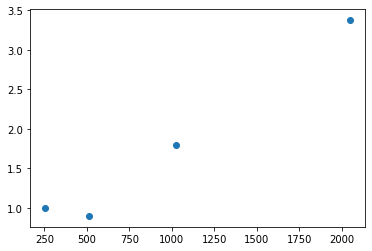

In [83]:
import matplotlib.pyplot as plt
import math
scale = durations[0][1]
x = [d[0] for d in durations]
y = [d[1]/scale for d in durations]
plt.scatter(x, y)
plt.show()